## Import Statements

In [348]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

from prophet import Prophet
import xgboost

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error



In [379]:
from sklearn.metrics import mean_squared_error
import itertools


In [349]:
#Notes

# Building prediction models based on global data and internal data and putting them together with the ensemble model
#internal_data_13_09.csv

## Getting Data

In [350]:
internal_data = pd.read_csv("./internal_data_13_09.csv")

external_data = pd.DataFrame()

In [ ]:
path = "C:\Users\timon\OneDrive\Uni\WS2324\Business_Intelligence_Systems\Capstone\bis_group6\output_data\run2_run_countryA_all_values"

data = ""




In [351]:
internal_data.head()

,Unnamed: 0,month_normalized,month,countryname,sales_actuals_monthly__vehiclegroup01__orderintake,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,...,premises__vehiclegroup01__in_sales_fill_zero,premises__vehiclegroup01__flag_production_start_meanbymonth,premises__vehiclegroup01__flag_production_start_interpolated_linear,premises__vehiclegroup01__flag_production_start_fill_zero,premises__vehiclegroup01__in_production_meanbymonth,premises__vehiclegroup01__in_production_interpolated_linear,premises__vehiclegroup01__in_production_fill_zero,quota__vehiclegroup01__aq_meanbymonth,quota__vehiclegroup01__aq_interpolated_linear,quota__vehiclegroup01__aq_fill_zero
0,0,1,1,Country A,296.0,352.0,0.0,25.0,0.0,81.0,...,0.0,11.111111,0.0,0.0,351.888889,0.0,0.0,182.5625,83.0,0.0
1,1,2,2,Country A,414.0,372.0,1.0,102.0,4.0,130.0,...,0.0,55.555556,0.0,0.0,363.222222,0.0,0.0,287.3750,83.0,0.0
2,2,3,3,Country A,405.0,604.0,2.0,152.0,2.0,145.0,...,0.0,5.555556,0.0,0.0,356.000000,0.0,0.0,345.0000,83.0,0.0
3,3,4,4,Country A,359.0,483.0,2.0,75.0,2.0,183.0,...,0.0,83.333333,0.0,0.0,374.555556,0.0,0.0,329.4375,83.0,0.0
4,4,5,5,Country A,403.0,474.0,10.0,91.0,4.0,201.0,...,0.0,72.222222,0.0,0.0,393.055556,0.0,0.0,343.5000,83.0,0.0


## Data cleaning

In [352]:
internal_data = internal_data.drop(["Unnamed: 0", "month", "countryname",  "premises__vehiclegroup01__in_sales_fill_zero", "premises__vehiclegroup01__flag_production_start_interpolated_linear", "premises__vehiclegroup01__flag_production_start_fill_zero", "premises__vehiclegroup01__in_production_interpolated_linear", "premises__vehiclegroup01__in_production_fill_zero", "quota__vehiclegroup01__aq_interpolated_linear", "quota__vehiclegroup01__aq_fill_zero"], axis = 1)


In [353]:
internal_data.shape

(258, 36)

## Data Preperation

In [354]:
#Splitting into target/feature data
y_meta = internal_data.loc[:, "sales_actuals_monthly__vehiclegroup01__orderintake"]
X_meta = internal_data.drop("sales_actuals_monthly__vehiclegroup01__orderintake", axis = 1)


In [355]:
y_sub = y_meta.iloc[:-18]
X_sub = X_meta.iloc[:-18, :]

## Prophet

In [356]:
X_pro = X_sub.copy()
X_pro["y"] = y_sub.copy()

X_pro["ds"] = X_pro.index

# Convert the 'ds' column to datetime format
start_date = '2000-01-01'  # Adjust this date to your needs
X_pro['ds'] = pd.to_datetime(X_pro['ds'].apply(lambda x: pd.DateOffset(months=x) + pd.Timestamp(start_date)))


In [357]:
X_pro_train = X_pro.iloc[:-18, :]
X_pro_test = X_pro.iloc[-18:, :]
X_pro.shape

X_pro_test.head()

,month_normalized,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,sales_flow_monthly__vehiclegroup01__cp8_meanbymonth,sales_flow_monthly__vehiclegroup01__cp8_interpolated_linear,sales_flow_monthly__vehiclegroup01__cp8_fill_zero,sales_stock_monthly__vehiclegroup01__physical_meanbymonth,...,premises__vehiclegroup01__flag_order_start_meanbymonth,premises__vehiclegroup01__flag_order_start_interpolated_linear,premises__vehiclegroup01__flag_order_start_fill_zero,premises__vehiclegroup01__in_sales_meanbymonth,premises__vehiclegroup01__in_sales_interpolated_linear,premises__vehiclegroup01__flag_production_start_meanbymonth,premises__vehiclegroup01__in_production_meanbymonth,quota__vehiclegroup01__aq_meanbymonth,y,ds
222,7,947.0,433.0,604.0,444.0,792.0,229.0,229.0,229.0,856.0,...,0.0,0.0,0.0,667.0,667.0,0.0,590.0,296.000000,185.0,2018-07-01
223,8,498.0,344.0,595.0,290.0,454.0,2.0,2.0,2.0,441.0,...,0.0,0.0,0.0,667.0,667.0,0.0,128.0,73.714286,96.0,2018-08-01
224,9,151.0,314.0,474.0,315.0,277.0,9.0,9.0,9.0,345.0,...,0.0,0.0,0.0,667.0,667.0,200.0,179.0,319.733333,123.0,2018-09-01
225,10,94.0,326.0,467.0,307.0,233.0,99.0,99.0,99.0,367.0,...,0.0,0.0,0.0,667.0,667.0,0.0,179.0,172.000000,129.0,2018-10-01
226,11,214.0,351.0,462.0,334.0,232.0,100.0,100.0,100.0,530.0,...,333.0,333.0,333.0,306.0,306.0,0.0,179.0,235.000000,172.0,2018-11-01


In [358]:
X_pro_test.head()

,month_normalized,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,leasing_contracts__vehiclegroup01__end,leasing_contracts__vehiclegroup01__start,sales_flow_monthly__vehiclegroup01__cp8_meanbymonth,sales_flow_monthly__vehiclegroup01__cp8_interpolated_linear,sales_flow_monthly__vehiclegroup01__cp8_fill_zero,sales_stock_monthly__vehiclegroup01__physical_meanbymonth,...,premises__vehiclegroup01__flag_order_start_meanbymonth,premises__vehiclegroup01__flag_order_start_interpolated_linear,premises__vehiclegroup01__flag_order_start_fill_zero,premises__vehiclegroup01__in_sales_meanbymonth,premises__vehiclegroup01__in_sales_interpolated_linear,premises__vehiclegroup01__flag_production_start_meanbymonth,premises__vehiclegroup01__in_production_meanbymonth,quota__vehiclegroup01__aq_meanbymonth,y,ds
222,7,947.0,433.0,604.0,444.0,792.0,229.0,229.0,229.0,856.0,...,0.0,0.0,0.0,667.0,667.0,0.0,590.0,296.000000,185.0,2018-07-01
223,8,498.0,344.0,595.0,290.0,454.0,2.0,2.0,2.0,441.0,...,0.0,0.0,0.0,667.0,667.0,0.0,128.0,73.714286,96.0,2018-08-01
224,9,151.0,314.0,474.0,315.0,277.0,9.0,9.0,9.0,345.0,...,0.0,0.0,0.0,667.0,667.0,200.0,179.0,319.733333,123.0,2018-09-01
225,10,94.0,326.0,467.0,307.0,233.0,99.0,99.0,99.0,367.0,...,0.0,0.0,0.0,667.0,667.0,0.0,179.0,172.000000,129.0,2018-10-01
226,11,214.0,351.0,462.0,334.0,232.0,100.0,100.0,100.0,530.0,...,333.0,333.0,333.0,306.0,306.0,0.0,179.0,235.000000,172.0,2018-11-01


In [359]:
m = Prophet()

# Fit the model with train set
m.fit(X_pro_train)
X_prophet = m.predict(X_pro_train)
future = m.make_future_dataframe(periods=18, freq = "MS")

# Make predictions on the test set dates
forecast_pro = m.predict(future)

forecast_pro = forecast_pro.iloc[-18:,:]

#forecast_pro = forecast_pro.iloc[240:, :]

# Calculate errors
mse = mean_squared_error(X_pro_test['y'], forecast_pro['yhat'])
mae = mean_absolute_error(X_pro_test['y'], forecast_pro['yhat'])

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

16:55:17 - cmdstanpy - INFO - Chain [1] start processing
16:55:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 11702.4053531367
Mean Absolute Error: 88.58510888543088


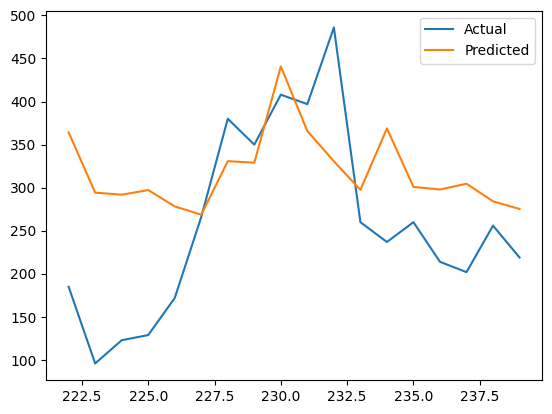

In [360]:

# Create a new figure
plt.figure()

# Plot y_test
plt.plot(X_pro_test["y"] , label='Actual')

# Plot y_pred
plt.plot(forecast_pro["yhat"], label='Predicted')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Define your parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Create a list of all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Assuming 'df' is your DataFrame with columns 'ds' and 'y'
df = X_pro_train # replace with your data

# Split the data into training and testing sets
train = df.iloc[:-18]
test = df.iloc[-18:]

# Perform grid search
best_params = None
lowest_mse = float('inf')

for params in all_params:
    m = Prophet(**params).fit(train)  # Fit the Prophet model
    forecast = m.predict(test)  # Make predictions
    mse = mean_absolute_percentage_error(test['y'], forecast['yhat'])  # Calculate MSE

    # Update best params if current MSE is lower than lowest_mse
    if mse < lowest_mse:
        lowest_mse = mse
        best_params = params

print(f"Best parameters: {best_params}")

## XGBRegressor

In [361]:
#Deviding data in lag/no-lag for the Regression
X_internal_no_lag = X_sub[["leasing_contracts__vehiclegroup01__end", "leasing_contracts__vehiclegroup01__start"]]
X_internal_lag = X_sub.drop(["leasing_contracts__vehiclegroup01__end", "leasing_contracts__vehiclegroup01__start"], axis = 1)

In [362]:
lag = 18

y_train_XGB = y_sub.iloc[lag:-lag]
y_test_XGB = y_sub.iloc[-lag:]

X_train_XGB = X_internal_lag.iloc[:-lag*2, :]
X_test_XGB = X_internal_lag.iloc[-lag*2:-lag, :]

print(y_train_XGB.shape)
print(y_test_XGB.shape) 
print(X_train_XGB.shape)
print(X_test_XGB.shape)

(204,)
(18,)
(204, 33)
(18, 33)


In [363]:
#Getting k-fold cross validation for time series ready
X_kfold = []
y_kfold = []

n_splits = 12

for n in range(1, n_splits + 1):
    X_kfold.append(X_train_XGB.iloc[:n*18])
    y_kfold.append(y_train_XGB.iloc[:n*18])

X_kfold[0].head()


,month_normalized,sales_actuals_monthly__vehiclegroup01__retail,customer_vehicle_relationships__vehiclegroup01__terminated_cars,customer_vehicle_relationships__vehiclegroup01__active_cars,sales_flow_monthly__vehiclegroup01__cp8_meanbymonth,sales_flow_monthly__vehiclegroup01__cp8_interpolated_linear,sales_flow_monthly__vehiclegroup01__cp8_fill_zero,sales_stock_monthly__vehiclegroup01__physical_meanbymonth,sales_stock_monthly__vehiclegroup01__physical_interpolated_linear,sales_stock_monthly__vehiclegroup01__physical_fill_zero,...,leads__vehiclegroup01__lost_interpolated_linear,leads__vehiclegroup01__lost_fill_zero,premises__vehiclegroup01__flag_order_start_meanbymonth,premises__vehiclegroup01__flag_order_start_interpolated_linear,premises__vehiclegroup01__flag_order_start_fill_zero,premises__vehiclegroup01__in_sales_meanbymonth,premises__vehiclegroup01__in_sales_interpolated_linear,premises__vehiclegroup01__flag_production_start_meanbymonth,premises__vehiclegroup01__in_production_meanbymonth,quota__vehiclegroup01__aq_meanbymonth
0,1,352.0,0.0,25.0,175.888889,2.0,0.0,495.000000,0.0,0.0,...,0.0,0.0,92.555556,0.0,0.0,253.055556,0.0,11.111111,351.888889,182.5625
1,2,372.0,1.0,102.0,245.888889,2.0,0.0,513.000000,0.0,0.0,...,0.0,0.0,27.777778,0.0,0.0,257.666667,0.0,55.555556,363.222222,287.3750
2,3,604.0,2.0,152.0,273.800000,2.0,0.0,473.777778,0.0,0.0,...,0.0,0.0,55.611111,0.0,0.0,265.388889,0.0,5.555556,356.000000,345.0000
3,4,483.0,2.0,75.0,270.100000,2.0,0.0,420.444444,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,229.888889,0.0,83.333333,374.555556,329.4375
4,5,474.0,10.0,91.0,268.400000,2.0,0.0,372.555556,0.0,0.0,...,0.0,0.0,46.277778,0.0,0.0,237.611111,0.0,72.222222,393.055556,343.5000


In [364]:
# Train a XGBClassifier
for i in range(n_splits):
    xgb_sub_1 = xgboost.XGBRegressor(use_label_encoder=False, eval_metric="mae").fit(X_kfold[i], y_kfold[i])

X_xgb = xgb_sub_1.predict(X_kfold[-1])

In [365]:
y_test_XGB = y_test_XGB.reset_index()
y_test_XGB = y_test_XGB.drop("index", axis = 1)

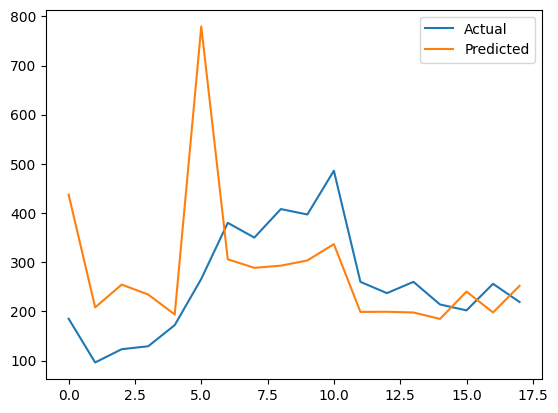

In [366]:
forecast_xgb = xgb_sub_1.predict(X_test_XGB)

# Create a new figure
plt.figure()

# Plot y_test
plt.plot(y_test_XGB , label='Actual')

# Plot y_pred
plt.plot(forecast_xgb, label='Predicted')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## SARIMA

In [367]:
#Placeholder

## Ensemble XGBRegressor

In [368]:
X_xgb_train = pd.DataFrame(X_xgb)
X_prophet_train_temp = pd.DataFrame(X_prophet["yhat"])

X_prophet_train = X_prophet_train_temp[18:]
X_prophet_train = X_prophet_train.reset_index()
X_prophet_train = X_prophet_train.drop("index", axis = 1)

In [369]:
print(X_xgb_train.shape)
print(X_prophet_train.shape)

(204, 1)
(204, 1)


In [370]:
X_xgb_test = pd.DataFrame(forecast_xgb)
X_prophet_test = pd.DataFrame(forecast_pro["yhat"])

In [371]:
print(X_xgb_test.shape)
print(X_prophet_test.shape)

(18, 1)
(18, 1)


In [372]:
#Data Preperation for ensemble model

X_meta_train = pd.DataFrame()
X_meta_train["xgb"] = X_xgb_train.copy()
X_meta_train["prophet"] = X_prophet_train.copy()

X_meta_test = pd.DataFrame()
X_meta_test["xgb"] = X_xgb_test.copy()
X_meta_test["prophet"] = X_prophet_test.copy()

In [373]:
X_meta_train.tail()


,xgb,prophet
199,441.065002,324.012663
200,554.978333,432.134617
201,458.945923,361.119370
202,235.973984,324.602045
203,185.071152,288.992112


In [374]:
xgb_sub_2 = xgboost.XGBRegressor(use_label_encoder=False, eval_metric="mae").fit(X_meta_train, y_train_XGB)

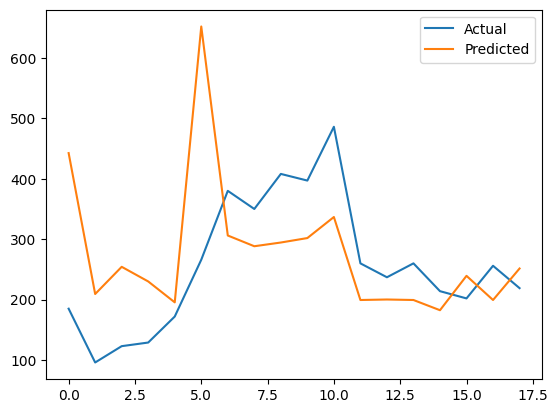

In [378]:
forecast_meta = xgb_sub_2.predict(X_meta_test)

y_meta_test = y_meta[-36:-18]
y_meta_test = y_meta_test.reset_index()
y_meta_test = y_meta_test.drop("index", axis = 1)

# Create a new figure
plt.figure()

# Plot y_test
plt.plot(y_meta_test, label='Actual')

# Plot y_pred
plt.plot(forecast_meta, label='Predicted')

# Add a legend
plt.legend()

# Show the plot
plt.show()